# Homework 1:

Generate a set of 𝑁 points of the function $sin^2(𝑥)$ between $0$ and $2 \pi$, including an array of 𝑥 positions, 𝑦=𝑓(𝑥) and first derivative 𝑦′=𝑓′(𝑥)

Show which polynomial gives the best approximation to the real function, Hermite or Lagrange polynomial.

## Instructions:
Below you will find some examples but try not to use the infamous copy and paste method.
Use those as a reference. (Except the hermite polynomial routine (hdiff, hermite) which you can copy and paste)

### Useful examples:
use as a reference, $\color{red}{\text{DO NOT COPY & PASTE}}$ (except a Hermite function - below)

#### Interpolation using interp1d

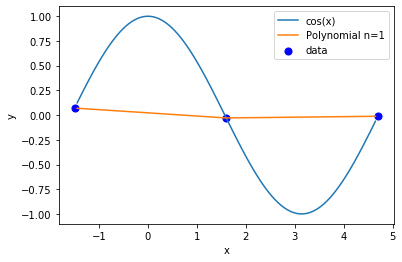

In [1]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([-1.5, 1.6, 4.7])
y = np.array([0.071,-0.029,-0.012])
yprime=np.array([1,-1,1])

# Linear polynomial n=1
poly1=interp1d(x,y,kind='linear') # kind='quadratic'

#xdata=np.linspace(-1.5,4.7,101)
xdata = np.linspace(-np.pi/2.0, 3*np.pi/2.0, 101, endpoint=False)[2:]
fig,ax=plt.subplots(1,1)
ax.scatter(x,y,c='blue',s=50,label='data')
ax.plot(xdata,np.cos(xdata),label='cos(x)')
ax.plot(xdata,poly1(xdata),label='Polynomial n=1')
ax.set_xlabel('x'), ax.set_ylabel('y')
ax.legend()

#### Interpolation using Lagrange Polynomial

In [2]:
from scipy.interpolate import lagrange
L=lagrange(x,y)

#### Interpolation using Hermite Polynomial

In [3]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
# and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
# differences using derivatives
       a[2*i+1] = yprime[i]
       a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a
    
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum    

Hinterp = hermite(x, y, yprime, xdata)

# Answer:

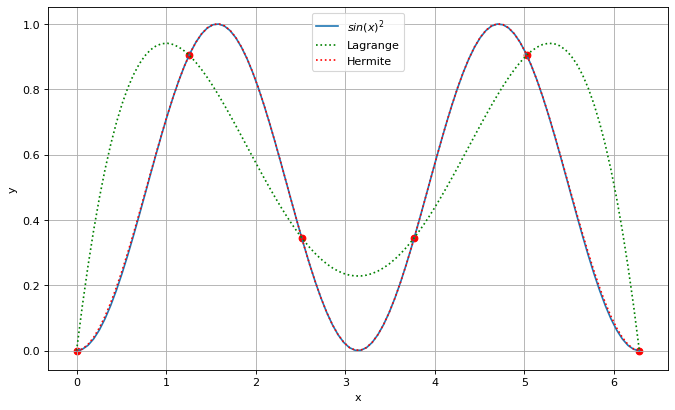

In [4]:
#Libraries Python 
import numpy as np
import scipy.interpolate as sp
import matplotlib.pyplot as plt

N = 6

#Arrays
data = np.linspace(0,2*np.pi, N)
y = np.sin(data)**2
yprime = 2* np.sin(data) * np.cos(data)

#Interpolate using Lagrange Polynomial
L = sp.lagrange(data,y)


x = np.linspace(0,2*np.pi, 100)

#Interpolate using Hermmite
H = hermite(data, y, yprime, x)


#Plot
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(data,y, color = "red")
plt.plot(x, np.sin(x)**2, label = "$sin(x)^2$")
plt.plot(x, L(x), linestyle = ":",color = "green",label = "Lagrange")
plt.plot(x, H,linestyle = ":",color = "red", label = "Hermite") 
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True);


**Conclusión** =  Con el método de interpolación de Hermite se logra una mayor aproximaxión a la función real